In [1]:
import nltk
nltk.download('punkt') 
nltk.download('wordnet') 
pip install python-dateutil

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:

# nltk.download('averaged_perceptron_tagger')
# pip install gensim
# pip inst
# all tensorflow
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
# pip install cuml

In [5]:
# !pip install scipy==1.10.1

In [3]:
import nltk
import h5py
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import sys
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag

from scipy.linalg import triu
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument





In [4]:
# Hide deprecated warnings of sklearn package
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# code Initialization

In [5]:


true_csv_path = 'true.csv'  
fake_csv_path = 'fake.csv'  

true_df = pd.read_csv(true_csv_path)
fake_df = pd.read_csv(fake_csv_path)

true_df['label'] = '0'
fake_df['label'] = '1'

true_df.to_csv(true_csv_path, index=False)
fake_df.to_csv(fake_csv_path, index=False)


In [6]:
true_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date label  
0  December 31, 2017      0  
1  December 29, 2017      0  
2  December 31, 2017      0  
3  December 30, 2017      0  
4  December 29, 2017      0

In [7]:
fake_df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date label  
0  December 31, 2017     1  
1  December 31, 2017     1  
2  December 30, 2017     1  
3  December 29, 2017     1  
4  December 25, 2017     1

In [8]:
# Merge DataFrames
merged_df = pd.concat([true_df, fake_df], ignore_index=True)


merged_df = merged_df.sample(frac=1).reset_index(drop=True) #randomized 

merged_csv_path = 'merged.csv'  
merged_df.to_csv(merged_csv_path, index=False)

print(f'Merged file saved to: {merged_csv_path}')

Merged file saved to: merged.csv


In [9]:
merge_csv_path = 'merged.csv'
df = pd.read_csv(merge_csv_path)

# Data cleaning 

1.1.	Removing HTML tags or unwanted characters
    1.1.1.	Eliminating special characters, punctuation
    1.1.2.	remove common English stopwords.
1.2.	Converting text to lowercase
1.3.	finding rows with missing values
    1.3.1.	Filling missing values with a placeholder
    1.3.2.	Imputing missing values
    1.3.3.	Removing rows with unnecessary missing values
1.4.	Text Length (Characters)
    1.4.1.	Word Count:


In [10]:

# Function to clean text
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower().strip()
    return text

df['cleaned_title'] = df['title'].apply(clean_text)
df['cleaned_text'] = df['text'].apply(clean_text)




In [11]:
# Load stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)


df['cleaned_title_no_stopwords'] = df['cleaned_title'].apply(remove_stop_words)
df['cleaned_text_no_stopwords'] = df['cleaned_text'].apply(remove_stop_words)


In [12]:

df.drop(['cleaned_text', 'cleaned_title',], axis=1, inplace=True)



## Steemming

In [13]:
#stemming
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

#stemming to a text
def stem_text(text):
    word_tokens = word_tokenize(text)
    stemmed_text = [stemmer.stem(word) for word in word_tokens]
    return ' '.join(stemmed_text)

#progress visualization
def stem_with_progress(data, column_name):
    stemmed_data = []
    total = len(data)
    print("Starting stemming process...")
    for i, text in enumerate(data[column_name], 1):
        stemmed_data.append(stem_text(text))
        if i % 100 == 0 or i == total:  
            sys.stdout.write('\rProgress: {0:.2f}%'.format(100 * i/total))
            sys.stdout.flush()
    print("\nStemming process completed.")
    return stemmed_data


df['stemmed_title'] = stem_with_progress(df, 'cleaned_title_no_stopwords')
df['stemmed_text'] = stem_with_progress(df, 'cleaned_text_no_stopwords')


Starting stemming process...
Progress: 100.00%
Stemming process completed.
Starting stemming process...
Progress: 100.00%
Stemming process completed.


## Lemmetization

In [14]:
#lemmetization
# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to convert NLTK's part-of-speech tags to WordNet's part-of-speech tags
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if unknown

# apply lemmatization to a text
def lemmatize_text(text):
    word_tokens = word_tokenize(text)
    pos_tagged_tokens = pos_tag(word_tokens)
    lemmatized_text = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tagged_tokens]
    return ' '.join(lemmatized_text)

# progress visualization
def lemmatize_with_progress(data, column_name):
    lemmatized_data = []
    total = len(data)
    print("Starting lemmatization process...")
    for i, text in enumerate(data[column_name], 1):
        lemmatized_data.append(lemmatize_text(text))
        if i % 100 == 0 or i == total:  # Update progress every 100 items or at the end
            sys.stdout.write('\rProgress: {0:.2f}%'.format(100 * i/total))
            sys.stdout.flush()
    print("\nLemmatization process \completed.")
    return lemmatized_data


df['lemmatized_title'] = lemmatize_with_progress(df, 'stemmed_title')
df['lemmatized_text'] = lemmatize_with_progress(df, 'stemmed_text') 

Starting lemmatization process...
Progress: 100.00%
Lemmatization process \completed.
Starting lemmatization process...
Progress: 100.00%
Lemmatization process \completed.


In [15]:
# Check for missing values 
missing_values = df.isnull().sum()


print(missing_values)


title                         0
text                          0
subject                       0
date                          0
label                         0
cleaned_title_no_stopwords    0
cleaned_text_no_stopwords     0
stemmed_title                 0
stemmed_text                  0
lemmatized_title              0
lemmatized_text               0
dtype: int64


In [16]:
df.drop(['cleaned_title_no_stopwords', 'cleaned_text_no_stopwords','stemmed_title','stemmed_text'], axis=1, inplace=True)

## date conversion 

In [17]:
from dateutil import parser


def safe_parse_date(x):
    try:
        
        if isinstance(x, str) and not x.startswith('http'):
            return parser.parse(x).strftime('%m/%d/%Y')
    except ValueError:
        pass
    return None  

df['date'] = df['date'].apply(lambda x: safe_parse_date(x))


print(df['date'].head())


0    01/26/2016
1    10/10/2015
2    01/23/2016
3    07/13/2016
4    09/06/2017
Name: date, dtype: object


In [18]:
df.drop(['text', 'title',], axis=1, inplace=True)
df.head()

subject        date  label  \
0     politicsNews  01/26/2016      0   
1  Government News  10/10/2015      1   
2             News  01/23/2016      1   
3     politicsNews  07/13/2016      0   
4         politics  09/06/2017      1   

                                    lemmatized_title  \
0     obama ban solitari confin juvenil feder prison   
1  judg order yr old amish girl take chemotherapy...   
2            watch trump insult troop didnt want see   
3             clinton say trump divis candid lifetim   
4  rino senat red state tell illeg alien do noth ...   

                                     lemmatized_text  
0  washington reuter u presid barack obama opinio...  
1  take chemotherapi sweetieth govern know best o...  
2  donald trump use imag nonamerican militari cam...  
3  speech weight america complic racial histori d...  
4  fact explain daca recipi realli nation undaca ...

In [19]:

df['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [20]:
# Remove rows where the 'date' column has NaN values
df = df.dropna(subset=['date'])

# Verify the removal by checking for NaN values again
print(df['date'].isnull().sum())


0


In [21]:
df.head()

subject        date  label  \
0     politicsNews  01/26/2016      0   
1  Government News  10/10/2015      1   
2             News  01/23/2016      1   
3     politicsNews  07/13/2016      0   
4         politics  09/06/2017      1   

                                    lemmatized_title  \
0     obama ban solitari confin juvenil feder prison   
1  judg order yr old amish girl take chemotherapy...   
2            watch trump insult troop didnt want see   
3             clinton say trump divis candid lifetim   
4  rino senat red state tell illeg alien do noth ...   

                                     lemmatized_text  
0  washington reuter u presid barack obama opinio...  
1  take chemotherapi sweetieth govern know best o...  
2  donald trump use imag nonamerican militari cam...  
3  speech weight america complic racial histori d...  
4  fact explain daca recipi realli nation undaca ...

## sentiment ANALYSIS

In [22]:
import pandas as pd
from textblob import TextBlob

df['sentiment'] = df['lemmatized_text'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [23]:
for index, row in df.iterrows():
    sentiment_score = row['sentiment']
    sentiment_score2 = row['label']
    print(f"Document {index} has a sentiment polarity of {sentiment_score} and the sentiment score is {sentiment_score2}")

    if sentiment_score < 0:
        print("The sentiment is negative.")
    elif sentiment_score > 0:
        print("The sentiment is positive.")
    else:
        print("The sentiment is neutral.")


Document 0 has a sentiment polarity of -0.10673926767676768 and the sentiment score is 0
The sentiment is negative.
Document 1 has a sentiment polarity of 0.20609390609390607 and the sentiment score is 1
The sentiment is positive.
Document 2 has a sentiment polarity of -0.04206349206349206 and the sentiment score is 1
The sentiment is negative.
Document 3 has a sentiment polarity of 0.10136443803110469 and the sentiment score is 0
The sentiment is positive.
Document 4 has a sentiment polarity of -0.05918367346938776 and the sentiment score is 1
The sentiment is negative.
Document 5 has a sentiment polarity of 0.0659848484848485 and the sentiment score is 0
The sentiment is positive.
Document 6 has a sentiment polarity of -0.14490740740740737 and the sentiment score is 1
The sentiment is negative.
Document 7 has a sentiment polarity of 0.21428571428571427 and the sentiment score is 1
The sentiment is positive.
Document 8 has a sentiment polarity of 0.007991202346041065 and the sentiment

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




The sentiment is negative.
Document 35261 has a sentiment polarity of 0.07916666666666665 and the sentiment score is 0
The sentiment is positive.
Document 35262 has a sentiment polarity of -0.15274621212121212 and the sentiment score is 1
The sentiment is negative.
Document 35263 has a sentiment polarity of 0.06584145021645019 and the sentiment score is 1
The sentiment is positive.
Document 35264 has a sentiment polarity of -0.010258194186765619 and the sentiment score is 0
The sentiment is negative.
Document 35265 has a sentiment polarity of 0.135410927456382 and the sentiment score is 0
The sentiment is positive.
Document 35266 has a sentiment polarity of 0.18237603305785122 and the sentiment score is 1
The sentiment is positive.
Document 35267 has a sentiment polarity of 0.09144736842105262 and the sentiment score is 1
The sentiment is positive.
Document 35268 has a sentiment polarity of 0.13177156177156177 and the sentiment score is 1
The sentiment is positive.
Document 35269 has 

In [24]:
import pandas as pd


df['sentiment'] = df['sentiment'].astype(str)

In [25]:
df.dtypes

subject             object
date                object
label                int64
lemmatized_title    object
lemmatized_text     object
sentiment           object
dtype: object

# Vectorization

In [26]:
from gensim.models.doc2vec import TaggedDocument
#import pandas as pd

# Assuming 'df' is your DataFrame and 'cleaned_text_no_stopwords' is the column with preprocessed text
documents = [TaggedDocument(words=text.split(), tags=[i]) for i, text in enumerate(df['lemmatized_title'])]

In [27]:
import pandas as pd
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


lemmatized_docs = (df['subject']+" " +df['lemmatized_title'] + " " + df['lemmatized_text']+" "+ df['sentiment']).apply(lambda x: x.split())
print(lemmatized_docs)

tagged_title_data = [TaggedDocument(words=words, tags=[str(i)]) for i, words in enumerate(lemmatized_docs)]

max_epochs = 100
vec_size = 300
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha,
                min_alpha=0.00025,  # Gradual decay to the minimum alpha
                min_count=5,
                window=10,
                dm=1,
                )

model.build_vocab(tagged_title_data)
print('Training Doc2Vec Model')

for epoch in range(max_epochs):
    print(f'Training epoch {epoch + 1}/{max_epochs}')
    model.train(tagged_title_data,
                total_examples=model.corpus_count,
                epochs=1)  # Train for one epoch at a time
    model.alpha -= (alpha - model.min_alpha) / max_epochs  # Decrease the learning rate
    model.min_alpha = model.alpha  # Fix the learning rate, no decay

# Save the model
model.save("d2v_all_all21.model")
print("Model Saved")


0        [politicsNews, obama, ban, solitari, confin, j...
1        [Government, News, judg, order, yr, old, amish...
2        [News, watch, trump, insult, troop, didnt, wan...
3        [politicsNews, clinton, say, trump, divis, can...
4        [politics, rino, senat, red, state, tell, ille...
                               ...                        
44893    [Government, News, top, way, trump, cut, wast,...
44894    [worldnews, juncker, propos, sync, french, age...
44895    [left-news, boycottgrammi, turnoffthegrammysgr...
44896    [News, elizabeth, warren, shred, trump, call, ...
44897    [politics, your, hire, trump, pull, unemploy, ...
Length: 44888, dtype: object
Training Doc2Vec Model
Training epoch 1/100
Training epoch 2/100
Training epoch 3/100
Training epoch 4/100
Training epoch 5/100
Training epoch 6/100
Training epoch 7/100
Training epoch 8/100
Training epoch 9/100
Training epoch 10/100
Training epoch 11/100
Training epoch 12/100
Training epoch 13/100
Training epoch 14/100


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = Doc2Vec.load("d2v_all_all21.model")


X = [model.dv[str(i)] for i in range(len(df))]
y = df['label'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
f1_score = report['macro avg']['f1-score']  # Use 'weighted' if you want to consider label imbalance

print(f"F1 Score: {f1_score}")
print(classification_report(y_test, y_pred))
print(y.shape)

F1 Score: 0.975788014605789
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4306
           1       0.98      0.98      0.98      4672

    accuracy                           0.98      8978
   macro avg       0.98      0.98      0.98      8978
weighted avg       0.98      0.98      0.98      8978

(44888,)


In [29]:
import numpy as np
from gensim.models.doc2vec import Doc2Vec

# Load the Doc2Vec model
model = Doc2Vec.load("d2v_all_all21.model")



# Function to infer the mean word vector for words in a document
def infer_mean_vector(doc_words):

    if len(doc_words) == 0:
        return np.zeros(model.vector_size)
   
    return np.mean([model.wv[word] for word in doc_words if word in model.wv.key_to_index], axis=0)

# Combine document and word vectors
combined_vectors = []
for i, doc_words in enumerate(documents):
   
    if isinstance(doc_words[0], list):  
        doc_words = [word for sublist in doc_words for word in sublist] 


    doc_vector = model.dv[str(i)]
    mean_word_vector = infer_mean_vector(doc_words)


    combined_vector = np.concatenate((doc_vector, mean_word_vector))
    combined_vectors.append(combined_vector)



np_combined_vectors = np.array(combined_vectors)

print('Shape of the combined data:', np_combined_vectors.shape)

Shape of the combined data: (44888, 600)


# Model Building

In [30]:
# Extract labels from the DataFrame
labels = df['label'].values 

# Now, proceed with splitting the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(np_combined_vectors, labels, test_size=0.2, random_state=42)




In [31]:
import numpy as np

X_np = np.array(X)                 #X = [model.dv[str(i)] for i in range(len(df))]
labels_np = np.array(labels)


## Simple  binary classification

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm


labels = df['label'].values.astype(float)

scaler = StandardScaler()
np_combined_vectors_scaled = scaler.fit_transform(np_combined_vectors)

X_train, X_test, y_train, y_test = train_test_split(np_combined_vectors_scaled, labels, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

class BinaryClassifier(nn.Module):
    def __init__(self, n_features):
        super(BinaryClassifier, self).__init__()
        self.linear = nn.Linear(n_features, 1)  # Output is logits for BCEWithLogitsLoss
    
    def forward(self, x):
        return self.linear(x)

n_features = X_train.shape[1]
model = BinaryClassifier(n_features)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor.view(-1, 1))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

model.train()
n_epochs = 20  
for epoch in tqdm(range(n_epochs), desc='Epochs'):
    running_loss = 0.0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {running_loss / len(train_loader)}")

    model.eval()
    with torch.no_grad():
        outputs = model(X_train_tensor)
        predicted_probs = torch.sigmoid(outputs).view(-1)
        predicted_labels = torch.round(predicted_probs)  # Convert probabilities to binary labels
        train_accuracy = accuracy_score(y_train_tensor.numpy(), predicted_labels.numpy())
        print(f"Training Accuracy: {train_accuracy}")

    model.train()  

torch.save(model.state_dict(), "binary_classifier_model.pth")
print("Model saved to binary_classifier_model.pth")

model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted_probs = torch.sigmoid(outputs).view(-1)
    predicted_labels = torch.round(predicted_probs)  # Convert probabilities to binary labels
    test_accuracy = accuracy_score(y_test_tensor.numpy(), predicted_labels.numpy())
    print(f"Test Accuracy: {test_accuracy}")
    print("Final Test Classification Report:")
    print(classification_report(y_test_tensor.numpy(), predicted_labels.numpy(), digits=4))



ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

## Naive bayes

In [33]:
# naive bayes using sckit learn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef

labels = df['label'].values 


np_combined_vectors += np.abs(np_combined_vectors.min())

X_train, X_test, y_train, y_test = train_test_split(np_combined_vectors, labels, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))



kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa}")



Test Accuracy: 0.9712630875473379
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4306
           1       0.98      0.97      0.97      4672

    accuracy                           0.97      8978
   macro avg       0.97      0.97      0.97      8978
weighted avg       0.97      0.97      0.97      8978

Cohen's Kappa Score: 0.9424535335047495


# Support vector machine

In [34]:
#SVM using ski-it learn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef


labels = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(np_combined_vectors, labels, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear', max_iter=10000, tol=1e-3)


svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {mcc}")

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa}")


Test Accuracy: 0.9753842726665182
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4306
           1       0.97      0.98      0.98      4672

    accuracy                           0.98      8978
   macro avg       0.98      0.98      0.98      8978
weighted avg       0.98      0.98      0.98      8978

Matthews Correlation Coefficient: 0.9507024124760741
Cohen's Kappa Score: 0.950669988719031


In [35]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [36]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, matthews_corrcoef
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import joblib  


scaler = StandardScaler()
np_combined_vectors_scaled = scaler.fit_transform(np_combined_vectors)


#joblib.dump(scaler, 'scaler.joblib')


k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

accuracies = []
kappa_scores = []
mcc_scores = []

best_accuracy = 0  

for fold, (train_index, test_index) in enumerate(kf.split(np_combined_vectors_scaled), 1):
    X_train, X_test = np_combined_vectors_scaled[train_index], np_combined_vectors_scaled[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    accuracies.append(accuracy)
    kappa_scores.append(kappa)
    mcc_scores.append(mcc)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = svm_classifier  # Update the best model
    
    print(f"Fold {fold}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy}")
    print(f"Cohen's Kappa Score: {kappa}")
    print(f"Matthews Correlation Coefficient: {mcc}")
    print("-" * 30)

model_filename = 'best_svm_model.joblib'
joblib.dump(best_model, model_filename)
print(f"Best model saved to {model_filename}")

print(f"Average Accuracy across all folds: {np.mean(accuracies)}")
print(f"Average Cohen's Kappa Score across all folds: {np.mean(kappa_scores)}")
print(f"Average Matthews Correlation Coefficient across all folds: {np.mean(mcc_scores)}")


Fold 1
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4306
           1       0.99      0.99      0.99      4672

    accuracy                           0.99      8978
   macro avg       0.99      0.99      0.99      8978
weighted avg       0.99      0.99      0.99      8978

Accuracy: 0.9868567609712631
Cohen's Kappa Score: 0.9736649727860812
Matthews Correlation Coefficient: 0.9736746722908357
------------------------------
Fold 2
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4231
           1       0.98      0.99      0.99      4747

    accuracy                           0.98      8978
   macro avg       0.98      0.98      0.98      8978
weighted avg       0.98      0.98      0.98      8978

Accuracy: 0.9845177099576743
Cohen's Kappa Score: 0.9689236159272476
Matthews Correlation Coefficient: 0.9689364261060113
------------------------------
Fold 3
              preci

# Decision Tree classifier 

In [37]:
# decision tree using kfold from skilearn
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, matthews_corrcoef
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import pandas as pd


scaler = StandardScaler()
np_combined_vectors_scaled = scaler.fit_transform(np_combined_vectors)

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=2)

accuracies = []
kappa_scores = []
mcc_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(np_combined_vectors_scaled), 1):
    X_train, X_test = np_combined_vectors_scaled[train_index], np_combined_vectors_scaled[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    dt_classifier = DecisionTreeClassifier(random_state=2)
    
    dt_classifier.fit(X_train, y_train)
    
    y_pred = dt_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    accuracies.append(accuracy)
    kappa_scores.append(kappa)
    mcc_scores.append(mcc)
    
    print(f"Fold {fold}")
    print(f"Accuracy: {accuracy}")
    print(f"Cohen's Kappa Score: {kappa}")
    print(f"Matthews Correlation Coefficient: {mcc}")
    print("-" * 30)

print(f"Average Accuracy across all folds: {np.mean(accuracies)}")
print(f"Average Cohen's Kappa Score across all folds: {np.mean(kappa_scores)}")
print(f"Average Matthews Correlation Coefficient across all folds: {np.mean(mcc_scores)}")


Fold 1
Accuracy: 0.7582980619291602
Cohen's Kappa Score: 0.5149470838281851
Matthews Correlation Coefficient: 0.5152290983442496
------------------------------
Fold 2
Accuracy: 0.7574069948763644
Cohen's Kappa Score: 0.5136854891177834
Matthews Correlation Coefficient: 0.5141195712141492
------------------------------
Fold 3
Accuracy: 0.7626420138115393
Cohen's Kappa Score: 0.5229706943945014
Matthews Correlation Coefficient: 0.5230991641725051
------------------------------
Fold 4
Accuracy: 0.7678511752255764
Cohen's Kappa Score: 0.5349571823101418
Matthews Correlation Coefficient: 0.5350904244847179
------------------------------
Fold 5
Accuracy: 0.7649548847053581
Cohen's Kappa Score: 0.5268412092420575
Matthews Correlation Coefficient: 0.5272709185422837
------------------------------
Average Accuracy across all folds: 0.7622306261095997
Average Cohen's Kappa Score across all folds: 0.5226803317785338
Average Matthews Correlation Coefficient across all folds: 0.522961835351581


# k nearest neighbour

In [38]:
#knn with folds 
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler
import numpy as np



scaler = StandardScaler()
np_combined_vectors_scaled = scaler.fit_transform(np_combined_vectors)


k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)


fold_accuracies = []
fold_kappa_scores = []
fold_mcc_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(np_combined_vectors_scaled), 1):

    X_train, X_test = np_combined_vectors_scaled[train_index], np_combined_vectors_scaled[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    knn_classifier = KNeighborsClassifier(n_neighbors=2)
    
    knn_classifier.fit(X_train, y_train)
    
    y_pred = knn_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    
    fold_accuracies.append(accuracy)
    fold_kappa_scores.append(kappa)
    fold_mcc_scores.append(mcc)
    
    
    print(f"Fold {fold}")
    print(f"Accuracy: {accuracy}")
    print(f"Cohen's Kappa Score: {kappa}")
    print(f"Matthews Correlation Coefficient: {mcc}")
    print("-" * 30)


print(f"Average Accuracy across all folds: {np.mean(fold_accuracies)}")
print(f"Average Cohen's Kappa Score across all folds: {np.mean(fold_kappa_scores)}")
print(f"Average Matthews Correlation Coefficient across all folds: {np.mean(fold_mcc_scores)}")


Fold 1
Accuracy: 0.8587658721318779
Cohen's Kappa Score: 0.7154359299750814
Matthews Correlation Coefficient: 0.7226488488695192
------------------------------
Fold 2
Accuracy: 0.8579861884606816
Cohen's Kappa Score: 0.7129402544483421
Matthews Correlation Coefficient: 0.7188213956209314
------------------------------
Fold 3
Accuracy: 0.8586544887502785
Cohen's Kappa Score: 0.7153926526417932
Matthews Correlation Coefficient: 0.7215017354191512
------------------------------
Fold 4
Accuracy: 0.8609780550295199
Cohen's Kappa Score: 0.7197962157206501
Matthews Correlation Coefficient: 0.7241560497413414
------------------------------
Fold 5
Accuracy: 0.8580817645093015
Cohen's Kappa Score: 0.7142661482864185
Matthews Correlation Coefficient: 0.7192889777838064
------------------------------
Average Accuracy across all folds: 0.8588932737763318
Average Cohen's Kappa Score across all folds: 0.715566240214457
Average Matthews Correlation Coefficient across all folds: 0.7212834014869499


In [39]:
#knn with param_grid and model saving
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import joblib  



X_train, X_test, y_train, y_test = train_test_split(np_combined_vectors, labels, test_size=0.2, random_state=42)

param_grid = {
    'n_neighbors': [2, 3, 5, 7, 10],
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}


knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")


best_knn = grid_search.best_estimator_
joblib.dump(best_knn, 'best_knn_model.joblib')


y_pred = best_knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Test Accuracy (Optimized): {accuracy}")
print("KNN Classification Report (Optimized):")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}
Best Score: 0.715009746588694
KNN Test Accuracy (Optimized): 0.7217643127645356
KNN Classification Report (Optimized):
              precision    recall  f1-score   support

           0       0.90      0.47      0.62      4306
           1       0.66      0.95      0.78      4672

    accuracy                           0.72      8978
   macro avg       0.78      0.71      0.70      8978
weighted avg       0.78      0.72      0.70      8978



# Logistic regression

In [40]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, matthews_corrcoef
import numpy as np
import joblib



k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)


fold_accuracies = []
fold_kappa_scores = []
fold_mcc_scores = []


for train_index, test_index in kf.split(np_combined_vectors):
    X_train, X_test = np_combined_vectors[train_index], np_combined_vectors[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    logistic_model = LogisticRegression(max_iter=1000, random_state=42)
    
    logistic_model.fit(X_train, y_train)
    
    y_pred = logistic_model.predict(X_test)
    
    fold_accuracies.append(accuracy_score(y_test, y_pred))
    fold_kappa_scores.append(cohen_kappa_score(y_test, y_pred))
    fold_mcc_scores.append(matthews_corrcoef(y_test, y_pred))


print(f"Average Logistic Regression Test Accuracy: {np.mean(fold_accuracies)}")
print(f"Average Cohen's Kappa Score across all folds: {np.mean(fold_kappa_scores)}")
print(f"Average Matthews Correlation Coefficient across all folds: {np.mean(fold_mcc_scores)}")



Average Logistic Regression Test Accuracy: 0.9883710935445954
Average Cohen's Kappa Score across all folds: 0.9766893644344492
Average Matthews Correlation Coefficient across all folds: 0.9766928861406594


# Gradient Boosting

In [47]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score, cohen_kappa_score, matthews_corrcoef
import numpy as np
import joblib



gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

scorers = {
    'accuracy_score': make_scorer(accuracy_score),
    'cohen_kappa_score': make_scorer(cohen_kappa_score),
    'matthews_corrcoef': make_scorer(matthews_corrcoef)
}


cv_results = {}
for scorer_name, scorer in scorers.items():
    cv_score = cross_val_score(gbm, np_combined_vectors, labels, cv=skf, scoring=scorer, n_jobs=-1)
    cv_results[scorer_name] = cv_score
    print(f"Average {scorer_name}: {np.mean(cv_score)}")


gbm.fit(np_combined_vectors, labels)
joblib.dump(gbm, 'gbm_model.joblib')


Average accuracy_score: 0.9259044096081487
Average cohen_kappa_score: 0.851463923102102
Average matthews_corrcoef: 0.8514850901774265


['gbm_model.joblib']

# Ensemble Model

In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np




X_train, X_test, y_train, y_test = train_test_split(np_combined_vectors, labels, test_size=0.2, random_state=42)

log_clf = LogisticRegression(random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier()

ensemble_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', tree_clf), ('knn', knn_clf)],
    voting='soft'  # or 'soft' if you want to weigh probabilities for classification tasks
)

ensemble_clf.fit(X_train, y_train)


y_pred = ensemble_clf.predict(X_test)
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred))


Ensemble Model Accuracy: 0.8754733793717977


In [46]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import joblib
from tqdm import tqdm


X_train, X_test, y_train, y_test = train_test_split(np_combined_vectors, labels, test_size=0.2, random_state=42)

base_models = [
    ('gb', GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42))
]

stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), cv=5)

print("Training Stacking Model...")
for train_index, test_index in tqdm(list(StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_train, y_train)), desc="Folds"):
    X_fold_train, X_fold_test = X_train[train_index], X_train[test_index]
    y_fold_train, y_fold_test = y_train[train_index], y_train[test_index]
    stacking_model.fit(X_fold_train, y_fold_train)  


joblib.dump(stacking_model, 'stacking_model.joblib')
print("Stacking model saved successfully.")

print("Predicting on test data...")
y_pred = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Model Test Accuracy: {accuracy}")
print("Stacking Model Classification Report:")
print(classification_report(y_test, y_pred))


Training Stacking Model...



Folds: 100%|██████████| 5/5 [5:00:30<00:00, 3606.04s/it]  

Stacking model saved successfully.
Predicting on test data...
Stacking Model Test Accuracy: 0.8898418355981288
Stacking Model Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      4306
           1       0.89      0.90      0.89      4672

    accuracy                           0.89      8978
   macro avg       0.89      0.89      0.89      8978
weighted avg       0.89      0.89      0.89      8978



# Neural Network

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       153,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,041 (777.50 KB)

 Trainable params: 198,081 (773.75 KB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/40
982/982 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5541 - loss: 0.8709 - val_accuracy: 0.9263 - val_loss: 0.3456
Epoch 2/40
982/982 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8153 - loss: 0.3985 - val_accuracy: 0.9764 - val_loss: 0.1148
Epoch 3/40
982/982 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9215 - loss: 0.2017 - val_accuracy: 0.9800 - val_loss: 0.0739
Epoch 4/40
982/982 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9498 - loss: 0.1391 - val_accuracy: 0.9836 - val_loss: 0.0543
Epoch 5/40
982/982 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9595 - loss: 0.1145 - val_accuracy: 0.9857 - val_loss: 0.0449
Epoch 6/40
982/982 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9613 - loss: 0.1041 - val_accuracy: 0.9861 - val_loss: 0.0406
Epoch 7/40
982/982 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9660 - loss: 0.0955 - val_accuracy: 0.9870 - val_loss: 0.0394
Epoch 8/40
982/982 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9690 - loss: 0.0884 - val_accuracy: 0

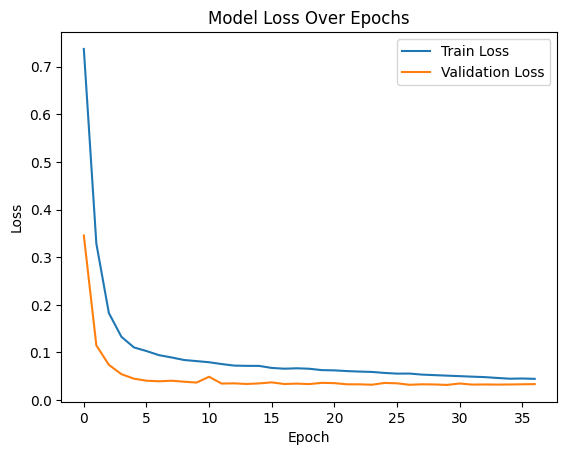

Enhanced model saved successfully.


In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
np.random.seed(42)
tf.random.set_seed(42)


X_train, X_test, y_train, y_test = train_test_split(np_combined_vectors, labels, test_size=0.30, random_state=42)



model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],)),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.4),
    Dense(32),
    LeakyReLU(alpha=0.01),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=40, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping],
                    verbose=1)


test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc}")

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


model.save('nn_model_enhanced.keras')
print("Enhanced model saved successfully.")


# model prediction on external data

In [ ]:
import numpy as np
from gensim.models.doc2vec import Doc2Vec
import joblib
from textblob import TextBlob
import re

doc2vec_model = Doc2Vec.load("d2v_all_all21.model")
classifier_model = joblib.load("best_svm_model.joblib")

def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()

def calculate_sentiment(text):
    
    sentiment = TextBlob(text).sentiment.polarity
    return str(sentiment)  

def infer_mean_vector(doc_words, model):
    if len(doc_words) == 0:
        return np.zeros(model.vector_size)
    return np.mean([model.wv[word] for word in doc_words if word in model.wv.key_to_index], axis=0)

def vectorize_and_combine(text, model):
    sentiment_str = calculate_sentiment(text['text'])
    combined_text = f"{text['subject']} {text['title']} {text['text']} {sentiment_str}"
    preprocessed_text = preprocess_text(combined_text)
    words = preprocessed_text.split()
    doc_vector = model.infer_vector(words)
    mean_word_vector = infer_mean_vector(words, model)
    combined_vector = np.concatenate((doc_vector, mean_word_vector))
    return combined_vector

test_data = [
    {'subject': "worldnews", 'title': "China, South Korea agree to mend ties after THAAD standoff", 'text': "SEOUL/BEIJING (Reuters) - Seoul and Beijing on Tuesday agreed to move beyond a year-long stand-off over the deployment of a U.S. anti-missile system in South Korea, a dispute that has been devastating to South Korean businesses that rely on Chinese consumers. The unexpected detente comes just days before U.S. President Donald Trump begins a trip to Asia, where the North Korean nuclear crisis will take center stage, and helped propel South Korean stocks to a record high. The installation of the U.S. Terminal High Altitude Area Defense (THAAD) system had angered China, with South Korea s tourism, cosmetics and entertainment industries bearing the brunt of a Chinese backlash, although Beijing has never specifically linked that to the THAAD deployment. Beijing worries the THAAD system s powerful radar can penetrate into Chinese territory.  Both sides shared the view that the strengthening of exchange and cooperation between Korea and China serves their common interests and agreed to expeditiously bring exchange and cooperation in all areas back on a normal development track,  South Korea s foreign ministry said in a statement. Before the THAAD dispute, bilateral relations flourished,  despite Beijing s historic alliance with North Korea and Seoul s close ties with Washington, which includes hosting 28,500 U.S. troops. China is South Korea s biggest trading partner.  At this critical moment all stakeholders should be working together to address the North Korea nuclear challenge instead of creating problems for others,  said Wang Dong, associate professor of international studies at China s Peking University.  This sends a very positive signal that Beijing and Seoul are determined to improve their relations.  As part of the agreement, South Korean President Moon Jae-in will meet Chinese President Xi Jinping on the sidelines of the summit of Asia-Pacific Economic Cooperation (APEC) countries in Vietnam on Nov. 10-11. South Korea recognized China s concerns over THAAD and made it clear the deployment was not aimed at any third country and did not harm China s strategic security interests, China s foreign ministry said. China reiterated its opposition to the deployment of THAAD, but noted South Korea s position and hoped South Korea could appropriately handle the issue, it added.  China s position on the THAAD issue is clear, consistent and has not changed,  Chinese Foreign Ministry spokeswoman Hua Chunying told a daily briefing in Beijing. The thaw is a big relief for South Korean tourism and retail firms as well as K-pop stars and makers of films and soap operas, which had found themselves unofficially unwelcome in China over the past year. In South Korea, a halving of inbound Chinese tourists in the first nine months of the year cost the economy $6.5 billion in lost revenue based on the average spending of Chinese visitors in 2016, data from the Korea Tourism Organization shows. The spat knocked about 0.4 percentage points off this year s expected economic growth, according to the Bank of Korea, which now forecasts an expansion of 3 percent. The sprawling Lotte Group, which provided the land where the THAAD battery was installed and is a major operator of hotels and duty free stores, has been hardest hit. It faces a costly overhaul and is expected to sell its Chinese hypermarket stores for a fraction of what it invested. A spokesman for holding company Lotte Corp expressed hope that South Korean firms  activity in China would improve following the announcement. An official at Seoul s presidential Blue House, who declined to be named given the sensitivity of the matter, said improvements for South Korean companies would come slowly. Shares in South Korean tourism and retail companies rallied nonetheless, with Asiana Airlines gaining 3.6 percent and Lotte Shopping up 7.14 percent. The benchmark Kospi index hit a record for a third straight day, gaining 0.9 percent. China has grown increasingly angry with North Korea s ongoing pursuit of nuclear weapons and ballistic missiles in defiance of United Nations sanctions, even as it chafes at U.S. pressure to rein in its isolated ally. The recent deterioration in ties between China and North Korea may have contributed to Tuesday s agreement, the Blue House official said. Pyongyang has undertaken an unprecedented missile testing program in recent months, as well as its biggest nuclear test yet in early September, as it seeks to develop a powerful nuclear weapon capable of reaching the United States. The head of NATO on Tuesday urged all United Nations members to fully and transparently implement sanctions against North Korea.  North Korea s ballistic and nuclear tests are an affront to the United Nations Security Council,  NATO Secretary General Jens Stoltenberg said in Tokyo, where he met Japanese Prime Minister Shinzo Abe. Separately, a South Korean lawmaker said North Korea probably stole South Korean warship blueprints after hacking into a local shipbuilder s database last April. Expectations had been growing for a warming in the frosty bilateral ties following this month s conclave of China s Communist Party, during which Xi cemented his status as China s most powerful leader after Mao Zedong. Earlier this month, South Korea and China agreed to renew a $56 billion currency swap agreement, while Chinese airlines are reportedly planning to restore flight routes to South Korea that had been cut during the spat. Tuesday s agreement came after high-level talks led by Nam Gwan-pyo, deputy director of national security of the Blue House, and Kong Xuanyou, assistant foreign minister of China and the country s special envoy for North Korea-related matters. "}
    
]

test_vectors = np.array([vectorize_and_combine(item, doc2vec_model) for item in test_data])

predictions = classifier_model.predict(test_vectors)
print("Predictions:", predictions)
